# Aplicação de Geração de Índices de Vegetação em Imagens de Satélite

Este notebook apresenta uma aplicação para a geração e visualização de índices de vegetação, como NDVI (Índice de Vegetação por Diferença Normalizada), NDWI (Índice de Água Normalizado) e outros, a partir de imagens de satélite Landsat. A geração desses índices é útil para análise de cobertura vegetal, monitoramento ambiental, estudos agrícolas e outros fins relacionados à vegetação e recursos naturais.

#### Funcionalidades Principais:
1. **Geração de Índices de Vegetação:** O código é capaz de calcular vários índices de vegetação, como NDVI, NDWI, NDWI2 e NDMI, a partir das bandas espectrais de uma imagem de satélite Landsat.
2. **Visualização dos Índices:** Após a geração dos índices, o notebook apresenta subplots para visualização rápida de cada índice, destacando diferentes características da vegetação e dos corpos de água.

#### Quando Usar:
- **Análise de Cobertura Vegetal:** Os índices de vegetação são amplamente utilizados para avaliar a saúde e a distribuição da vegetação em uma determinada área.
- **Monitoramento Ambiental:** Podem ser aplicados para monitorar mudanças na vegetação ao longo do tempo, identificar áreas de desmatamento, detectar incêndios florestais, entre outros.
- **Estudos Agrícolas:** São úteis para monitorar a saúde das culturas, identificar estresses hídricos, estimar a produtividade agrícola, entre outros.

#### Vantagens:
- **Automatização do Processo:** O código automatiza o cálculo dos índices de vegetação a partir das bandas espectrais, economizando tempo e esforço.
- **Visualização Interativa:** A visualização dos índices em subplots permite uma análise rápida e eficiente das características da vegetação na área de interesse.

#### Possíveis Melhorias:
- **Interface Gráfica:** Implementar uma interface gráfica simples para permitir a seleção de imagens de satélite e a geração dos índices de forma mais intuitiva.
- **Suporte a Outros Formatos de Imagem:** Adicionar suporte para outros formatos de imagem de satélite, além das imagens Landsat.
- **Mais Opções de Visualização:** Incluir opções para ajustar as escalas de cores, adicionar legendas e personalizar a apresentação dos subplots.

Este notebook é uma ferramenta para geocientistas, analistas ambientais, agrônomos e outros profissionais que trabalham com análise de imagens de satélite e estudos ambientais. Ele oferece uma maneira eficiente de calcular e visualizar índices de vegetação, fornecendo insights importantes sobre a saúde e a distribuição da vegetação em uma determinada região.


In [26]:
# Importa as bibliotecas necessárias para visualização de dados
import rasterio
import matplotlib.pyplot as plt
from rasterio.plot import show


# Function to normalize the grid values
def normalize(array):
    """Normalizes numpy arrays into scale 0.0 - 1.0"""
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min))

def abrir_raster():
    path_b3 = 'imagens/LC09_L1TP_167078_20240216_20240216_02_T1_B3.TIF'
    path_b4 = 'imagens/LC09_L1TP_167078_20240216_20240216_02_T1_B4.TIF'
    path_b5 = 'imagens/LC09_L1TP_167078_20240216_20240216_02_T1_B5.TIF'
    path_b6 = 'imagens/LC09_L1TP_167078_20240216_20240216_02_T1_B6.TIF'

    with rasterio.open(path_b3, 'r') as dst_b3, \
     rasterio.open(path_b4, 'r') as dst_b4, \
     rasterio.open(path_b5, 'r') as dst_b5, \
     rasterio.open(path_b6, 'r') as dst_b6:
    # Lê as bandas 3, 4, 5 e 6 dos arquivos raster e atribui os dados às respectivas variáveis banda3, banda4, banda5 e banda6
        banda3 = dst_b3.read(1)
        banda4 = dst_b4.read(1)
        banda5 = dst_b5.read(1)
        banda6 = dst_b6.read(1)

        # Obtém o perfil de cada arquivo raster
        profile_b3 = dst_b3.profile     #para esse caso usamos da banda 3, pois eh o memso para todos

    return banda3, banda4, banda5, banda6, profile_b3 

def gerar_indices():
    # Chama a função abrir_raster para obter as bandas e o perfil da banda 3
    banda3, banda4, banda5, banda6, profile_b3 = abrir_raster()

    # normalizar as bandas
    green = normalize(banda3)
    red = normalize(banda4)
    n_nir = normalize(banda5)
    swir = normalize(banda6)


    # Calcular NDVI
    ndvi = (n_nir - red) / (n_nir + red)

    # Calcular NDWI
    ndwi = (green - n_nir) / (green + n_nir)

    # Calcular NDWI2
    ndwi2 = (swir - n_nir) / (swir + n_nir)

    # Calcular NDMI
    ndmi = (n_nir - swir) / (n_nir + swir)


    # Retorna os índices e o perfil da banda 3
    return ndvi, ndwi, ndwi2, ndmi, profile_b3


def plot():
    # Gerar os índices NDVI, NDWI, NDWI2, NDMI e o perfil da banda 3
    ndvi, ndwi, ndwi2, ndmi, profile_b3 = gerar_indices()

    # Criar a figura e os eixos para os subplots
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(21, 14))

    # Mostrar os subplots com os índices usando a função show() do rasterio.plot
    show(ndvi, ax=ax1, cmap='Greens', transform=profile_b3['transform'])
    ax1.set_title('NDVI')
    ax1.set_xlabel('Longitude')
    ax1.set_ylabel('Latitude')
    ax1.grid(True)
    ax1.legend(['High NDVI', 'Low NDVI'])

    show(ndwi, ax=ax2, cmap='Blues', transform=profile_b3['transform'])
    ax2.set_title('NDWI')
    ax2.set_xlabel('Longitude')
    ax2.set_ylabel('Latitude')
    ax2.grid(True)
    ax2.legend(['Water', 'Land'])

    show(ndwi2, ax=ax3, cmap='PuBu', transform=profile_b3['transform'])
    ax3.set_title('NDWI2')
    ax3.set_xlabel('Longitude')
    ax3.set_ylabel('Latitude')
    ax3.grid(True)
    ax3.legend(['High NDWI2', 'Low NDWI2'])

    show(ndmi, ax=ax4, cmap='viridis', transform=profile_b3['transform'])
    ax4.set_title('NDMI')
    ax4.set_xlabel('Longitude')
    ax4.set_ylabel('Latitude')
    ax4.grid(True)
    ax4.legend(['High NDMI', 'Low NDMI'])

    # Título geral da figura
    fig.suptitle('Índices', fontsize=16, fontweight='bold')

    # Ajusta o espaçamento entre os subplots
    plt.tight_layout()

    # Retorna a figura
    return 


C:\Users\User\AppData\Local\Temp\ipykernel_14672\1594476595.py:45: RuntimeWarning: invalid value encountered in divide
  ndvi = (n_nir - red) / (n_nir + red)
C:\Users\User\AppData\Local\Temp\ipykernel_14672\1594476595.py:48: RuntimeWarning: invalid value encountered in divide
  ndwi = (green - n_nir) / (green + n_nir)
C:\Users\User\AppData\Local\Temp\ipykernel_14672\1594476595.py:51: RuntimeWarning: invalid value encountered in divide
  ndwi2 = (swir - n_nir) / (swir + n_nir)
C:\Users\User\AppData\Local\Temp\ipykernel_14672\1594476595.py:54: RuntimeWarning: invalid value encountered in divide
  ndmi = (n_nir - swir) / (n_nir + swir)


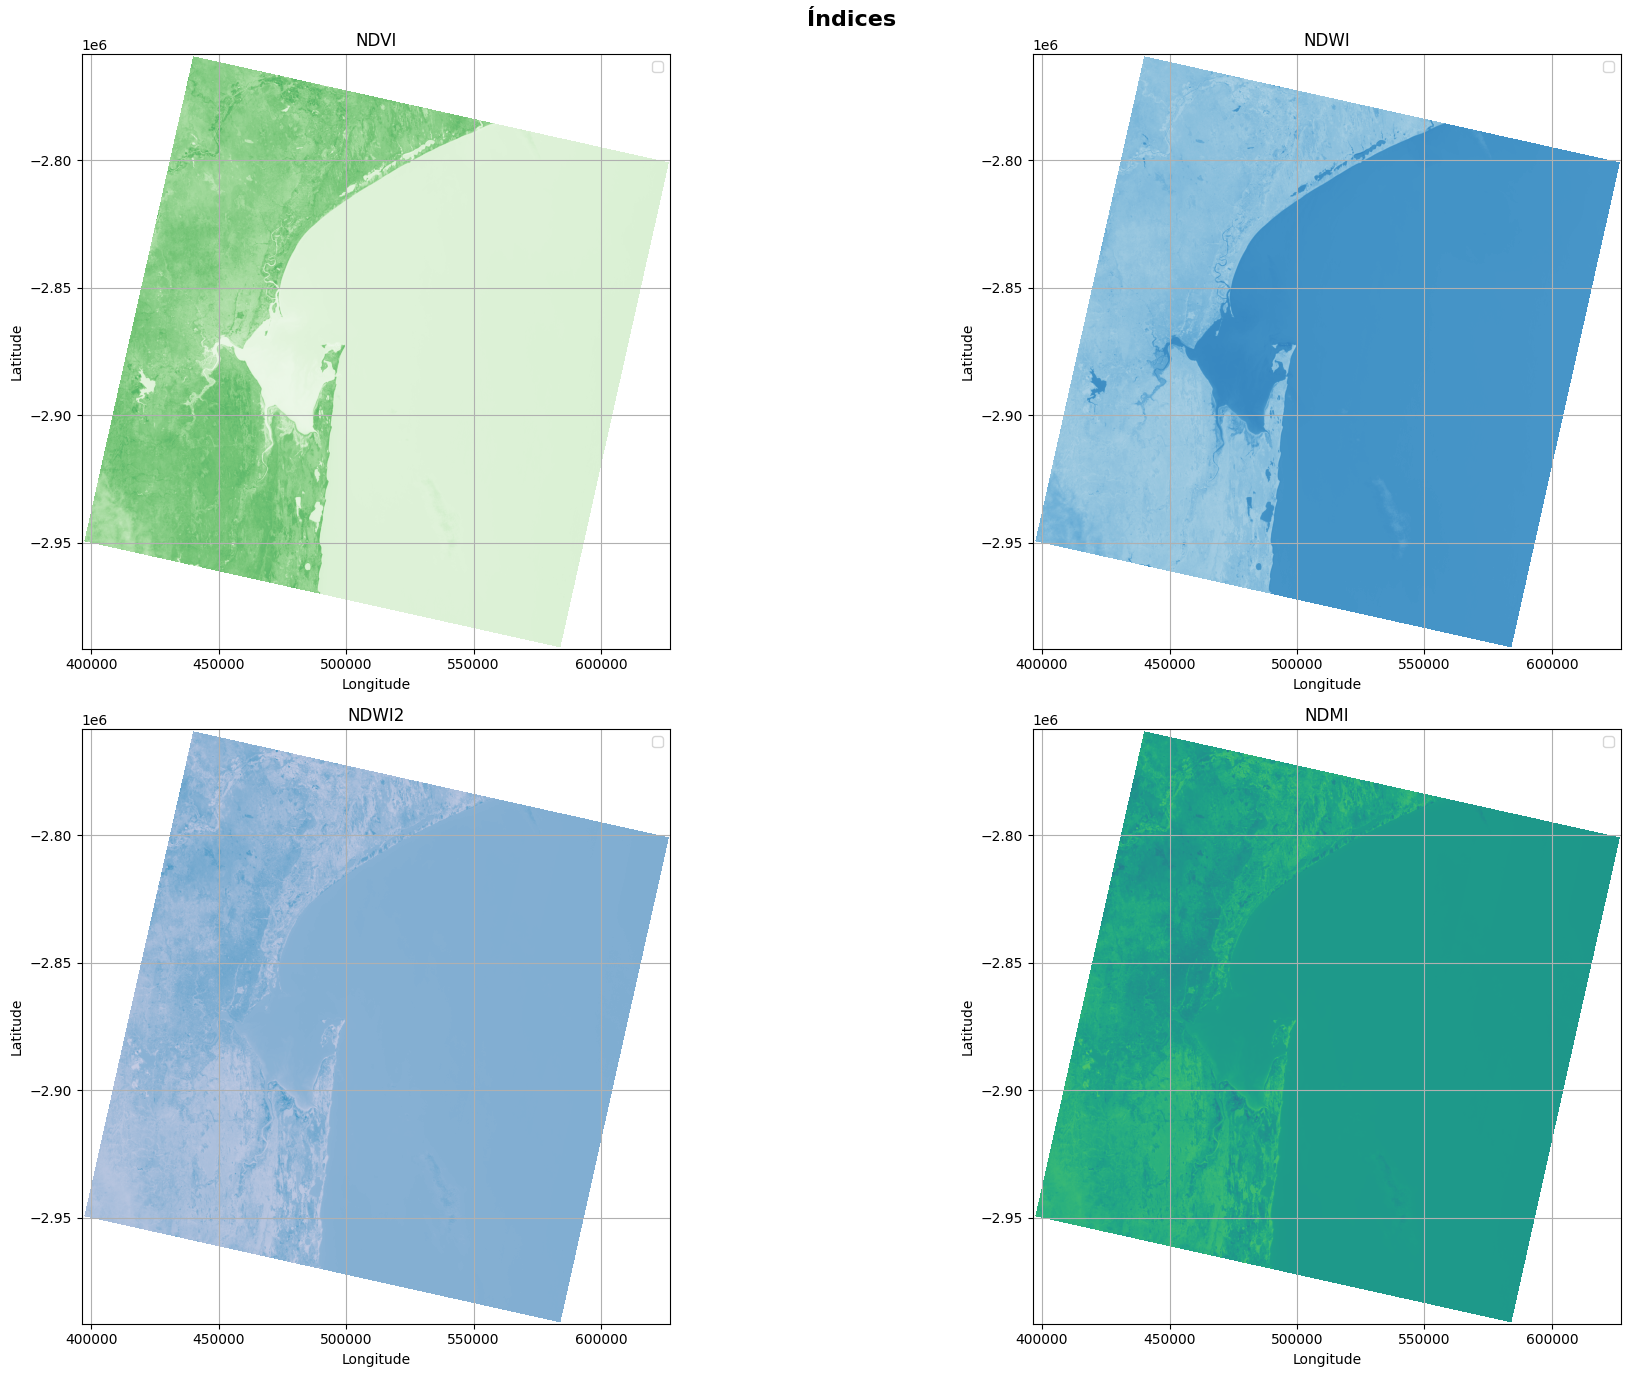

In [27]:
plot()